Q8. kNN Classification (sklearn)
1.	Use sklearn.neighbors.KNeighborsClassifier on the Iris dataset (only 2 features: sepal length, sepal width).
2.	Train models with k=1,3,5,10.
3.	Plot the decision boundaries for each k.
4.	Comment on how the boundaries change.


In [ ]:
# 1. Load data and prepare splits

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load iris dataset
iris_data = load_iris()
all_features = iris_data.data           # 4 features total
labels = iris_data.target               # 3 classes
feature_names = iris_data.feature_names
class_names = iris_data.target_names

# Use first two features (sepal length, sepal width)
X_small = all_features[:, :2]
chosen_features = feature_names[:2]

# Train/test split with stratification
X_tr, X_te, y_tr, y_te = train_test_split(
    X_small, labels,
    test_size=0.3,
    random_state=7,
    stratify=labels
)

print("Chosen features:", chosen_features)
print(f"Training samples: {X_tr.shape[0]}, Test samples: {X_te.shape[0]}")
print("Class counts in training set:",
      dict(zip(*np.unique(y_tr, return_counts=True))))

Chosen features: ['sepal length (cm)', 'sepal width (cm)']
Training samples: 105, Test samples: 45
Class counts in training set: {0: 35, 1: 35, 2: 35}


In [2]:
# 2. Train/evaluate multiple k-NN models

neighbor_values = [1, 3, 5, 10]
fitted_models = {}
acc_summary = []

for k_neighbors in neighbor_values:
    # Create pipeline (scaling + KNN)
    model = make_pipeline(
        StandardScaler(),
        KNeighborsClassifier(n_neighbors=k_neighbors)
    )
    model.fit(X_tr, y_tr)
    fitted_models[k_neighbors] = model

    # Evaluate
    train_score = accuracy_score(y_tr, model.predict(X_tr))
    test_score = accuracy_score(y_te, model.predict(X_te))
    acc_summary.append({
        "k": k_neighbors,
        "train_acc": train_score,
        "test_acc": test_score
    })
    print(f"k={k_neighbors}: train={train_score:.3f}, test={test_score:.3f}")

print("\nAccuracy summary:")
print(pd.DataFrame(acc_summary).set_index("k"))

k=1: train=0.943, test=0.667
k=3: train=0.867, test=0.667
k=5: train=0.848, test=0.689
k=10: train=0.838, test=0.711

Accuracy summary:
    train_acc  test_acc
k                      
1    0.942857  0.666667
3    0.866667  0.666667
5    0.847619  0.688889
10   0.838095  0.711111


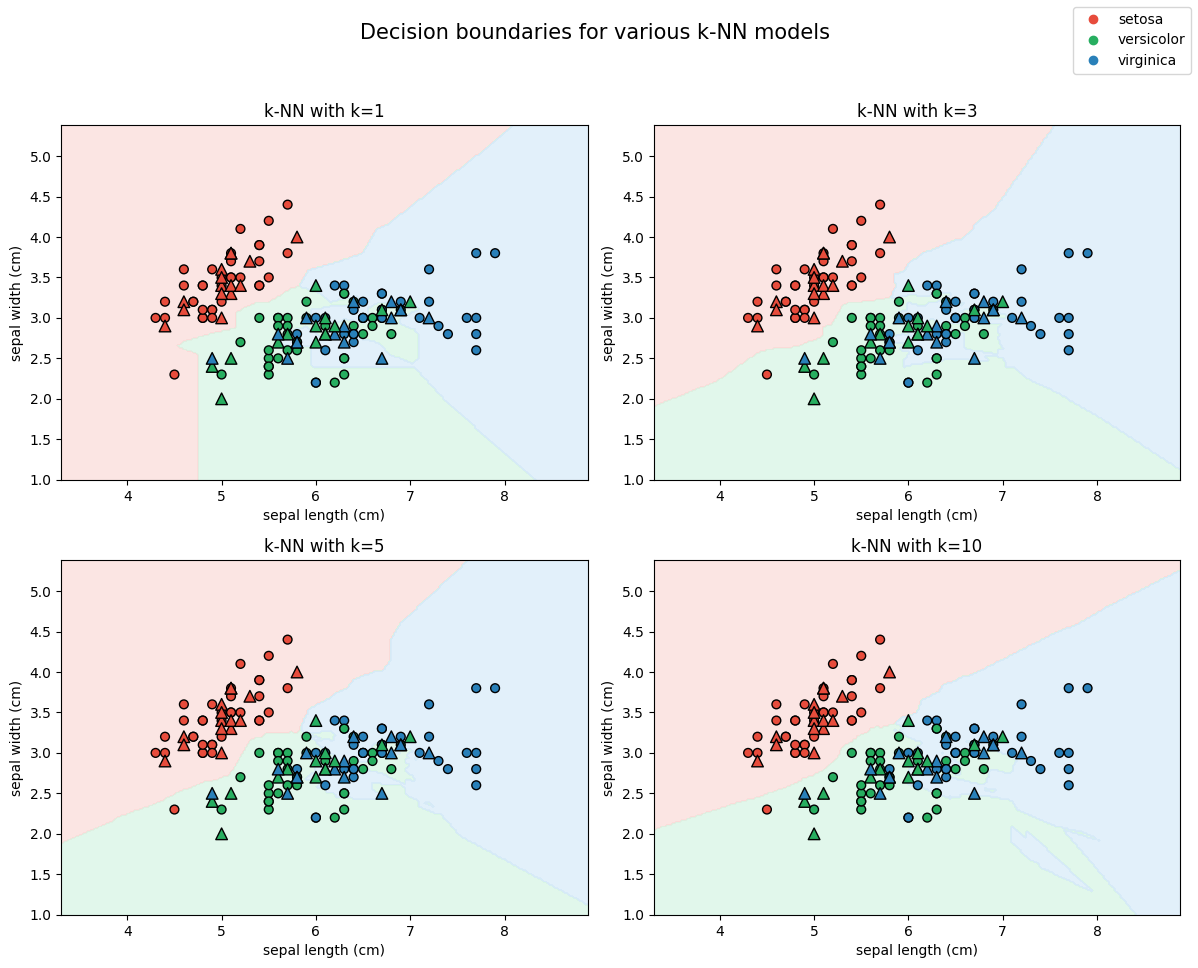

In [3]:
# 3. Visualize decision boundaries
# ------------------------------
# Mesh grid
step_size = 0.02
x_min, x_max = X_small[:, 0].min() - 1, X_small[:, 0].max() + 1
y_min, y_max = X_small[:, 1].min() - 1, X_small[:, 1].max() + 1
grid_x, grid_y = np.meshgrid(
    np.arange(x_min, x_max, step_size),
    np.arange(y_min, y_max, step_size)
)
grid_points = np.c_[grid_x.ravel(), grid_y.ravel()]

# Color maps
region_colors = ListedColormap(["#FADBD8", "#D5F5E3", "#D6EAF8"])
point_colors = ListedColormap(["#E74C3C", "#27AE60", "#2980B9"])

fig, ax_arr = plt.subplots(2, 2, figsize=(12, 10))
ax_arr = ax_arr.ravel()

for ax, k_neighbors in zip(ax_arr, neighbor_values):
    model = fitted_models[k_neighbors]
    # Predict over grid
    region_labels = model.predict(grid_points).reshape(grid_x.shape)
    ax.contourf(grid_x, grid_y, region_labels, cmap=region_colors, alpha=0.7)

    # Training points (circles)
    scatter_train = ax.scatter(X_tr[:, 0], X_tr[:, 1],
                               c=y_tr, cmap=point_colors,
                               edgecolor="k", s=40, label="train")
    # Test points (triangles)
    ax.scatter(X_te[:, 0], X_te[:, 1],
               c=y_te, cmap=point_colors, marker="^",
               edgecolor="k", s=70, label="test")

    ax.set_title(f"k-NN with k={k_neighbors}")
    ax.set_xlabel(chosen_features[0])
    ax.set_ylabel(chosen_features[1])
    ax.set_xlim(grid_x.min(), grid_x.max())
    ax.set_ylim(grid_y.min(), grid_y.max())

# Shared legend at figure level
handles, labels_ = scatter_train.legend_elements()
fig.legend(handles, class_names, loc="upper right")
plt.suptitle("Decision boundaries for various k-NN models", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

4. Comment on how the boundaries change.

Short Summary

k = 1: Extremely flexible. Each training point essentially defines its own region, producing very jagged boundaries. This yields low bias but high variance and a strong risk of overfitting.

k = 3: Boundaries start to smooth out. Three neighbors must agree, so outliers have less influence. Variance decreases and bias increases slightly.

k = 5: Boundaries are smoother and more regular. Small irregular regions vanish, improving generalization. Variance continues to drop, but bias may rise if k grows too large.

k = 10: Decision regions are broad and dominated by overall class structure. The model is stable to noise (low variance) but may underfit (higher bias) if k is too large for the dataset.

Practical Takeaways

As k increases: Decision boundaries become smoother; variance decreases, bias increases.

Bias–variance tradeoff: Small k → low bias/high variance; large k → high bias/low variance.

Choosing k: Use cross-validation to find the best tradeoff for your data.